<a href="https://colab.research.google.com/github/Pandu98-pkh/DeepLearning/blob/main/01.%20Week%201/Notebook%20Assigment/Regression%20Infrared%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Infrared Dataset**

## **1. Pemuatan dan Pemrosesan Data Awal**
### **1.1 Installasi**

In [266]:
!nvidia-smi
!pip install torch
!pip uninstall tensorflow
!pip install tensorflow
!pip install numpy pandas matplotlib scikit-learn

Sat Mar 15 01:06:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P0             29W /   70W |     108MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### **1.2 Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder # untuk mengubah label kelas menjadi angka
from sklearn.metrics import mean_squared_error, r2_score
import math

### **1.3 Memuat Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/Pandu98-pkh/DeepLearning/refs/heads/main/01.%20Week%201/Dataset/Infrared.csv"

try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Error loading dataset: {e}")


In [ ]:
df.sample(10) # menampilkan 10 sample data secara acak

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
708,Male,18-20,White,22.0,30.0,0.60,1.0725,36.9450,37.067500,36.382500,...,35.595000,35.1225,35.4225,35.442500,36.195,35.817500,37.1275,36.727500,36.742500,38.14
44,Female,18-20,White,23.4,16.0,0.60,0.5575,35.4075,35.505000,34.847500,...,34.095000,34.4250,34.2000,34.235000,35.060,34.675000,35.8100,35.730000,35.752500,37.09
1007,Female,18-20,Black or African-American,27.9,31.0,0.70,1.6450,35.5575,35.622500,34.737500,...,35.310000,35.3425,35.1875,35.372500,36.495,35.650000,36.5525,35.935000,35.967500,36.84
186,Male,31-40,Asian,23.2,35.2,0.60,0.9650,35.1275,34.827500,34.752500,...,33.885000,33.9400,34.0500,33.920000,34.920,34.522500,35.5100,35.327500,35.367500,36.54
399,Male,18-20,White,24.8,59.3,0.60,0.9000,36.6475,36.262500,36.310000,...,35.745000,35.3675,35.4375,35.657500,36.040,36.010000,36.7075,36.037500,36.075000,37.29
935,Female,21-25,White,24.0,20.2,0.64,0.8225,36.1700,35.870000,35.495000,...,34.740000,34.7750,34.5850,34.595000,35.495,35.142500,36.2900,35.687500,35.715000,36.99
479,Female,18-20,Asian,23.9,26.8,0.60,1.0500,34.5100,34.823333,33.933333,...,34.213333,34.5200,34.2300,34.226667,35.250,34.753333,35.6700,35.266667,35.306667,36.54
928,Male,18-20,Asian,24.1,16.3,0.70,0.7175,35.6900,35.772500,34.270000,...,34.452500,33.9150,34.2475,34.370000,35.115,34.745000,35.8700,35.502500,35.520000,36.64
933,Male,21-25,Black or African-American,23.9,19.3,0.64,0.9050,35.9750,36.297500,35.232500,...,35.325000,35.2575,35.1700,35.422500,36.145,35.622500,37.0325,36.992500,37.032500,37.94
21,Male,18-20,White,23.0,22.4,0.80,0.9450,35.7000,35.852500,35.172500,...,35.062500,35.2400,35.2025,34.770000,35.595,35.505000,36.0625,35.767500,35.792500,37.04


In [ ]:
df.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

### **1.4 Mengonversi dan Menormalisasi Data**

In [ ]:
# Mengubah data kategorikal menjadi angka
label_encoder = LabelEncoder()

# Mengubah label 'Gender' menjadi angka
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Mengubah label 'Age' menjadi angka
df['Age'] =label_encoder.fit_transform(df['Age'])

# Mengubah label 'Ethnicity' menjadi angka
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])

# Memisahkan kolom yang digunakan sebagai fitur dan label
X = df.drop('aveOralM', axis=1).values # Mengasumsikan 'aveOralM' adalah kolom label
y = df['aveOralM'].values.reshape(-1, 1)

# menampilkan data fitur dan label
print(X, y)

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% data latih, 20% data uji

[[ 1.      5.      5.     ... 35.6925 35.635  35.6525]
 [ 0.      4.      2.     ... 35.175  35.0925 35.1075]
 [ 0.      2.      5.     ... 35.9125 35.86   35.885 ]
 ...
 [ 0.      0.      2.     ... 36.535  35.965  35.9975]
 [ 1.      3.      3.     ... 35.86   35.415  35.435 ]
 [ 0.      0.      5.     ... 35.9725 35.89   35.9175]] [[36.59]
 [37.19]
 [37.34]
 ...
 [37.59]
 [37.29]
 [37.19]]


In [ ]:
X_train = np.nan_to_num(X_train)  # Ganti NaN dan inf dengan nilai numerik
X_test = np.nan_to_num(X_test)

### **1.5 Mempersiapkan Rumus Evaluasi (MSE, RMSE, RSquared)**

In [ ]:
def evaluate_model(y_true, y_pred):
  """
  Evaluates the performance of a regression model using MSE, RMSE, and R-squared.

  Args:
    y_true: True target values.
    y_pred: Predicted target values.

  Returns:
    A dictionary containing MSE, RMSE, and R-squared values.
  """

  mse = mean_squared_error(y_true, y_pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  return {"MSE": mse, "RMSE": rmse, "R-squared": r2}


### **1.6 Membuat Fungsi Visualisasi**

In [ ]:
# Fungsinya untuk menampilkan plot hasil prediksi
def plot_predictions(y_true, y_pred, model_name):
  """
  Plots predicted vs. actual values for a regression model.

  Args:
    y_true: True target values.
    y_pred: Predicted target values.
    model_name: Name of the model for the plot title.
  """
  plt.figure(figsize=(8, 6))
  plt.scatter(y_true, y_pred)
  plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Add diagonal line
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title(f"Predicted vs Actual Values ({model_name})")
  plt.grid(True)
  plt.show()

# # Fungsinya untuk menampilkan plot hasil training model
def plot_training_history(history, model_name):
    """
    Plots the training history (e.g., loss over epochs) for a model.

    Args:
        history: The training history object (e.g., from TensorFlow/Keras).
        model_name: The name of the model for the plot title.
    """
    plt.figure(figsize=(10, 5))

    # Assuming history contains 'loss' and 'val_loss' keys
    # Access the 'loss' column directly from the DataFrame
    if 'loss' in history.columns:  # Check if 'loss' is a column
        plt.plot(history['loss'], label='Training Loss')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training History ({model_name})")
    plt.legend()
    plt.grid(True)
    plt.show()


## **2. Deep Learning dengan PyTorch**

### **2.1 Import Library**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

### **2.2 Convert data to PyTorch tensors**

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
print(X_train)
print(X_train_tensor)

[[ 0.         0.         5.        ... 36.08      35.6233333 35.67     ]
 [ 0.         1.         2.        ... 36.0325    35.9775    36.0175   ]
 [ 1.         1.         5.        ... 38.145     37.875     37.9025   ]
 ...
 [ 0.         1.         5.        ... 36.065     35.8975    35.9375   ]
 [ 0.         1.         1.        ... 36.415     36.095     36.12     ]
 [ 1.         0.         4.        ... 36.14      36.115     36.14     ]]
tensor([[ 0.0000,  0.0000,  5.0000,  ..., 36.0800, 35.6233, 35.6700],
        [ 0.0000,  1.0000,  2.0000,  ..., 36.0325, 35.9775, 36.0175],
        [ 1.0000,  1.0000,  5.0000,  ..., 38.1450, 37.8750, 37.9025],
        ...,
        [ 0.0000,  1.0000,  5.0000,  ..., 36.0650, 35.8975, 35.9375],
        [ 0.0000,  1.0000,  1.0000,  ..., 36.4150, 36.0950, 36.1200],
        [ 1.0000,  0.0000,  4.0000,  ..., 36.1400, 36.1150, 36.1400]])


### **2.3 Susun Model Neural Network Sederhana**

In [ ]:
# Define the neural network architecture
class SimpleNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 1  # Output size (regression)
learning_rate = 0.01
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = SimpleNN(input_size, hidden_size, output_size)


In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
history = pd.DataFrame() # to store the loss values for plotting later
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Print progress
    history = pd.concat([history, pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})], ignore_index=True)

Epoch 0, loss=891.9669189453125
Epoch 100, loss=0.15438036620616913
Epoch 200, loss=0.1283247172832489
Epoch 300, loss=0.12295033782720566
Epoch 400, loss=0.11872798949480057
Epoch 500, loss=0.11509626358747482
Epoch 600, loss=0.1118459403514862
Epoch 700, loss=0.10891808569431305
Epoch 800, loss=0.10628970712423325
Epoch 900, loss=0.10394088923931122


In [ ]:
# prompt: Mengevaluasi Model dengan Menghitung MSE, RMSE, dan RSquared'

# Make predictions on the test set
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Evaluate the model
evaluation_results = evaluate_model(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")


Evaluation Results:
MSE: 0.09267065941494272
RMSE: 0.30441855957701186
R-squared: 0.5599101509827771


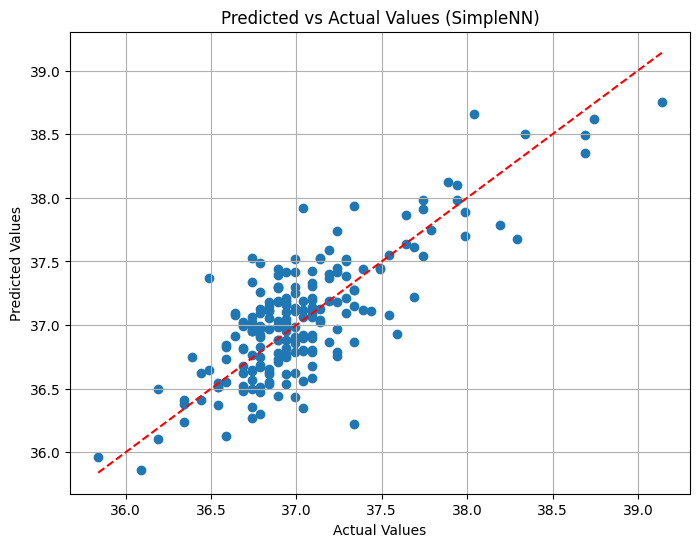

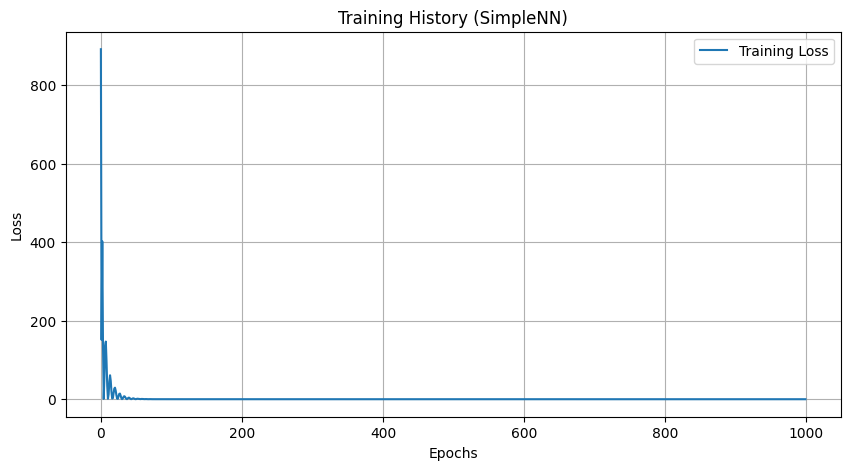

In [247]:
# Visualize the predictions
plot_predictions(y_test, y_pred, "SimpleNN")

# Visualize the training history (if available)
plot_training_history(history, "SimpleNN")

# Save the model's state dictionary
torch.save(model.state_dict(), 'simple_nn_model.pth')

In [254]:
# import untuk menambah layer pada model
import tensorflow as tf
# untuk membuat model neural network
from tensorflow.keras.models import Sequential
# untuk menambah layer pada model
from tensorflow.keras.layers import Dense, Input

In [259]:
# Menentukan hyperparameter model
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

# Inisialisasi model sequential
model_tf = Sequential([
    Input(shape=(input_dim,)), # Input layer
    Dense(hidden_dim, activation='relu') , # Layer input 128 neuron
    Dense(output_dim)  # Layer output 1 neuron
])

In [260]:
# Compile model (tentukan optimizer, loss function, dan metrics)
model_tf.compile(optimizer='adam', loss='mse', metrics=['mae']) # Contoh penggunaan Adam optimizer dan Mean Squared Error loss

# Print model summary
model_tf.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [263]:
# prompt: # Melatih model

# Train the TensorFlow/Keras model
history_tf = model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_tf = model_tf.predict(X_test)

# Evaluate the TensorFlow/Keras model
evaluation_results_tf = evaluate_model(y_test, y_pred_tf)

# Print the evaluation metrics
print("TensorFlow/Keras Evaluation Results:")
for metric, value in evaluation_results_tf.items():
    print(f"{metric}: {value}")

# Visualize the predictions
plot_predictions(y_test, y_pred_tf, "TensorFlow/Keras Model")

# Visualize the training history
plot_training_history(pd.DataFrame(history_tf.history), "TensorFlow/Keras Model")


Epoch 1/100


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-261-b42d0d3a8eea>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_4778]